In [243]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

In [244]:
df = pd.read_csv('dataset.csv', header=0)

In [245]:
df.shape

(4176, 11)

In [246]:
col_names = ['sn', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon', 'lat']
df.columns = col_names

df.columns

Index(['sn', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [247]:
del df['sn']
col_names.remove('sn')
df = df.drop(df[~df['CASE_STATUS'].apply(lambda x: isinstance(x, (str, int)))].index)
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [248]:
# remove columns log and lat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CASE_STATUS         4176 non-null   object 
 1   EMPLOYER_NAME       4176 non-null   object 
 2   SOC_NAME            4176 non-null   object 
 3   JOB_TITLE           4176 non-null   object 
 4   FULL_TIME_POSITION  4176 non-null   object 
 5   PREVAILING_WAGE     4176 non-null   float64
 6   YEAR                4176 non-null   int64  
 7   WORKSITE            4176 non-null   object 
 8   lon                 3915 non-null   float64
 9   lat                 3915 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 326.4+ KB


In [249]:
df["lon"].fillna(df["lon"].median(), inplace=True)
df["lat"].fillna(df["lat"].median(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CASE_STATUS         4176 non-null   object 
 1   EMPLOYER_NAME       4176 non-null   object 
 2   SOC_NAME            4176 non-null   object 
 3   JOB_TITLE           4176 non-null   object 
 4   FULL_TIME_POSITION  4176 non-null   object 
 5   PREVAILING_WAGE     4176 non-null   float64
 6   YEAR                4176 non-null   int64  
 7   WORKSITE            4176 non-null   object 
 8   lon                 4176 non-null   float64
 9   lat                 4176 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 326.4+ KB


In [250]:
for col in col_names:
    print(df[col].value_counts())

WITHDRAWN              1128
CERTIFIED-WITHDRAWN    1089
CERTIFIED              1005
DENIED                  954
Name: CASE_STATUS, dtype: int64
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION    44
IBM CORPORATION                                    42
CUMMINS INC.                                       37
IBM INDIA PRIVATE LIMITED                          29
MICROSOFT CORPORATION                              21
                                                   ..
VERTAFORE, INC.                                     1
ECHELON CORPORATION                                 1
NORTHWESTERN UNIVERSITY                             1
CAPGEMINI FINANCIAL SERVICES USA INC                1
DELOITTE &AMP; TOUCHE LLP                           1
Name: EMPLOYER_NAME, Length: 3054, dtype: int64
GENERAL AND OPERATIONS MANAGERS                       926
MANAGEMENT ANALYSTS                                   413
COMPUTER AND INFORMATION SYSTEMS MANAGERS             319
MARKET RESEARCH ANALYSTS AND MARKETING S

In [251]:
df.loc[~df['CASE_STATUS'].str.strip().isin(['CERTIFIED', 'CERTIFIED-WITHDRAWN']), 'CASE_STATUS'] = 'NO'
df.loc[~df['CASE_STATUS'].str.strip().isin(['NO']), 'CASE_STATUS'] = 'YES'

In [252]:
print(df["CASE_STATUS"].value_counts())

YES    2094
NO     2082
Name: CASE_STATUS, dtype: int64


In [253]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['CASE_STATUS']), df['CASE_STATUS'], test_size=0.2, random_state=42)

In [254]:
X_train.shape, X_test.shape

((3340, 9), (836, 9))

In [255]:
X_train.dtypes

EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                    int64
WORKSITE               object
lon                   float64
lat                   float64
dtype: object

In [256]:
import category_encoders as ce

In [257]:
encoder = ce.OrdinalEncoder(cols=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'WORKSITE'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()
X_train.shape

(3340, 9)

In [258]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [259]:
y_pred = clf.predict(X_test)

In [260]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7356459330143541


[Text(0.4131944444444444, 0.9166666666666666, 'X[4] <= 56264.0\nentropy = 1.0\nsamples = 3340\nvalue = [1694, 1646]'),
 Text(0.1875, 0.75, 'X[1] <= 5.5\nentropy = 0.753\nsamples = 892\nvalue = [699, 193]'),
 Text(0.1111111111111111, 0.5833333333333334, 'X[1] <= 4.5\nentropy = 0.141\nsamples = 200\nvalue = [196, 4]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[7] <= -84.361\nentropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(0.05555555555555555, 0.25, 'X[0] <= 868.0\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(0.027777777777777776, 0.08333333333333333, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.1111111111111111, 0.25, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.1388888888888889, 0.4166666666666667, 'entropy = 0.0\nsamples = 180\nvalue = [180, 0]'),
 Text(0.2638888888888889, 0.5833333333333334, 'X[1] <= 6.5\nentropy = 0.846\nsamples = 692\nvalue =

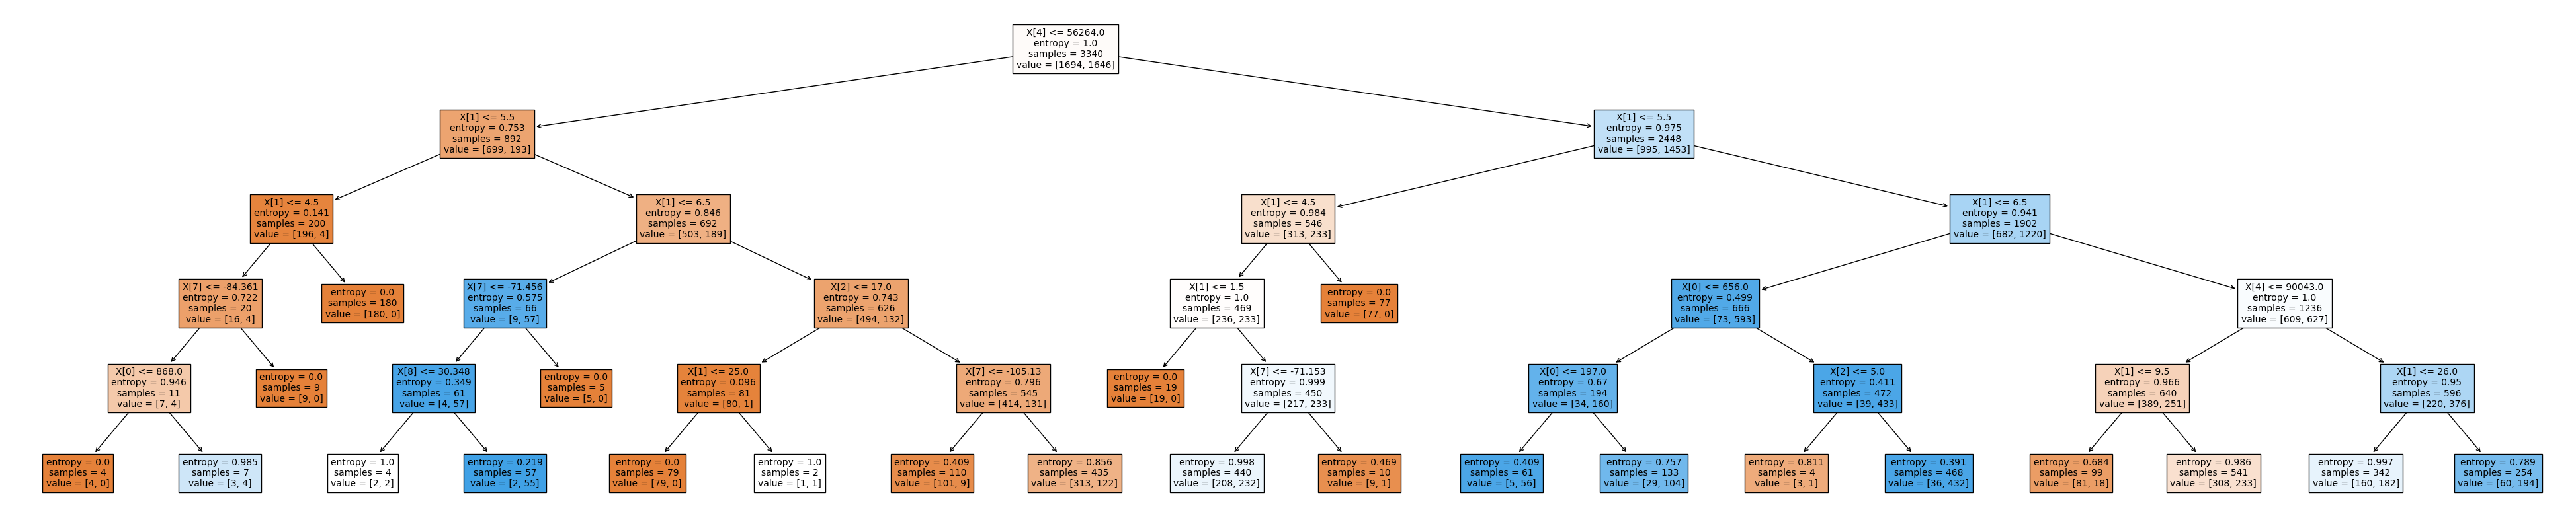

In [261]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))

from sklearn import tree

tree.plot_tree(clf, filled=True, fontsize=10)

[[268 120]
 [101 347]]


<AxesSubplot: >

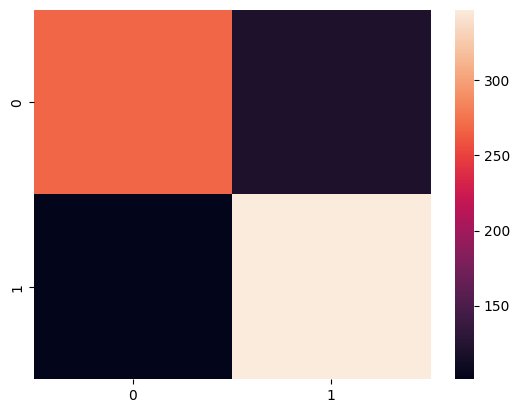

In [262]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
sns.heatmap(cm)

In [263]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.73      0.69      0.71       388
         YES       0.74      0.77      0.76       448

    accuracy                           0.74       836
   macro avg       0.73      0.73      0.73       836
weighted avg       0.74      0.74      0.74       836

